<a href="https://colab.research.google.com/github/MartinPSE/PyTorch_Basic/blob/main/Artifical_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## XOR 문제 -- 단층 퍼셉트론으로 구현하기


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim


device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(777)
if device == 'cuda':
  torch.cuda.manual_seed(777)

In [ ]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

In [ ]:
linear = nn.Linear(2,1, bias= True)
sigmoid = nn.Sigmoid()
model = nn.Sequential( linear, sigmoid).to(device)


In [ ]:
criterion = nn.BCELoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=1)

In [ ]:
for step in range(10001):
  optimizer.zero_grad()
  hypothesis = model(X)
  cost = criterion(hypothesis, Y)
  cost.backward()
  optimizer.step()

  if step % 1000 == 0:
    print(f'Cost :{cost}')
# XOR 문제를 못풀죠

Cost :0.7666423320770264
Cost :0.6931471824645996
Cost :0.6931471824645996
Cost :0.6931471824645996
Cost :0.6931471824645996
Cost :0.6931471824645996
Cost :0.6931471824645996
Cost :0.6931471824645996
Cost :0.6931471824645996
Cost :0.6931471824645996
Cost :0.6931471824645996


In [ ]:
with torch.no_grad():
  hypothesis = model(X)
  predicted = ( hypothesis > 0.5).float()
  accuracy = (predicted == Y).float().mean()
  print(f'모델의 출력값 : {hypothesis.detach().cpu().numpy()}')
  print(f'모델의 예측값 : {predicted.detach().cpu().numpy()}')
  print(f'실제값 : {Y.cpu().numpy()}')
  print(f'정확도 : {accuracy.cpu().numpy()}')

모델의 출력값 : [[0.5]
 [0.5]
 [0.5]
 [0.5]]
모델의 예측값 : [[0.]
 [0.]
 [0.]
 [0.]]
실제값 : [[0.]
 [1.]
 [1.]
 [0.]]
정확도 : 0.5


In [ ]:
0.5*(0.60944600 - 0.4)**2

0.021933813458000006

## XOR문제 - 다중 퍼셉트론 으로 구현

In [ ]:
# 다 그대로 model만 바꾸자

model = nn.Sequential(
    nn.Linear(2,10, bias=True),
    nn.Sigmoid(),
    nn.Linear(10,10, bias= True),
    nn.Sigmoid(),
    nn.Linear(10,10, bias=True),
    nn.Sigmoid(),
    nn.Linear(10,1, bias= True),
    nn.Sigmoid()

).to(device)

In [ ]:
# 손실함수와 optimizer 설정
criterion = nn.BCELoss().to(device)
optimizer = optim.SGD(model.parameters(), lr = 1)

for epoch in range(10001):
  optimizer.zero_grad()

  hypothesis = model(X)
  cost = criterion(hypothesis, Y)
  cost.backward()

  optimizer.step()

  if epoch % 1000 == 0:
    print(f'Epoch : {epoch} , Cost : {cost}')




Epoch : 0 , Cost : 0.7059202194213867
Epoch : 1000 , Cost : 0.6931094527244568
Epoch : 2000 , Cost : 0.692990779876709
Epoch : 3000 , Cost : 0.6911311149597168
Epoch : 4000 , Cost : 0.00198354572057724
Epoch : 5000 , Cost : 0.0005839311052113771
Epoch : 6000 , Cost : 0.00033233858994208276
Epoch : 7000 , Cost : 0.00022993754828348756
Epoch : 8000 , Cost : 0.00017488104640506208
Epoch : 9000 , Cost : 0.0001406921655870974
Epoch : 10000 , Cost : 0.00011744322546292096


In [ ]:
# 확인해보자

with torch.no_grad():
  hypothesis = model(X)
  predicted = (hypothesis > 0.5).float()
  accuracy = (predicted == Y).float().mean()
  print('모델의 출력값(Hypothesis): ', hypothesis.detach().cpu().numpy())
  print('모델의 예측값(Predicted): ', predicted.detach().cpu().numpy())
  print('실제값(Y): ', Y.cpu().numpy())
  print('정확도(Accuracy): ', accuracy.item())


모델의 출력값(Hypothesis):  [[9.6621581e-05]
 [9.9990034e-01]
 [9.9988222e-01]
 [1.5553457e-04]]
모델의 예측값(Predicted):  [[0.]
 [1.]
 [1.]
 [0.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  1.0


## 비선형 활성화 함수 (Activation function)
---
  활성화 함수의 특징은 선형 함수가 아닌 비선형 함수여야 한다는 점. <br>
  직선 1개로는 그릴 수 없는 함수를 말한다. <br>
  활성화 함수로 선형 함수를 사용해서 은닉층을 쌓게되면, y(x) = kx 꼴로 표현하는 정도가 끝이다. <br> 즉, 선형 함수로는 은닉층을 여러번 추가하더라도 1회 추가한 것과 차이를 줄 수 없다. 

### 시그모이드 함수 와 기울기 소실 ( Vanishing Gradient) 
<br>

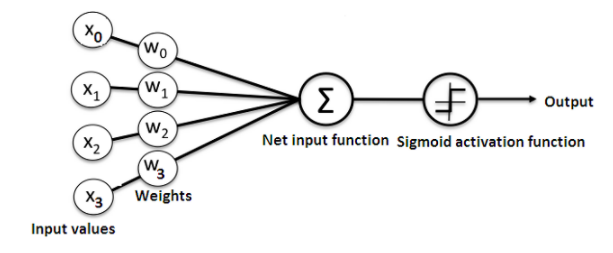

우선 인공 신경망은 입력에 대해서 순전파 (forward propagation) 연산을 하고, 그리고 순전파 연산을 통해 나온 예측값과 실제값의 오차를 손실 함수 (loss function)을 통해 계산하고, 그리고 이 손실(loss)을 미분을 통해서 기울기 (gradient)를 구하고, 이를 통해 역전파(backward propagation)을 수행한다.

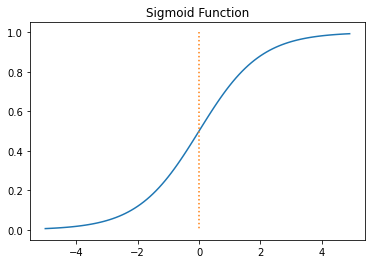

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

양 끝단을 보게되면 기울기가 거의 0에 근사한다. 그런데 역전파 과정에서 0에 가까운 아주 작은 기울기가 곱해지게 되면, 기울기가 잘 전달되지 않게된다! <br>
이러한 현상을 **기울기 소실(Vanishing Gradient) 문제**라고 한다. 

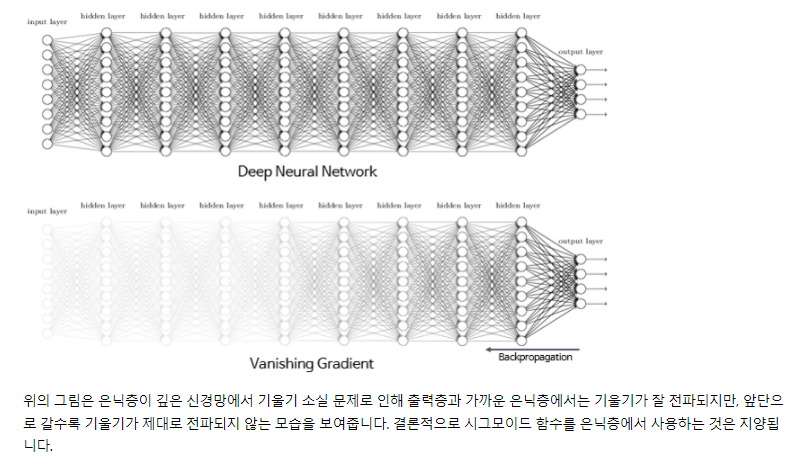

### 하이퍼볼릭탄젠트 함수 (tanh 함수)

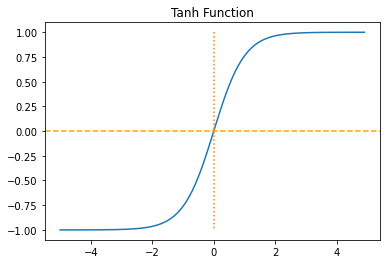

In [3]:
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = np.tanh(x)

plt.plot(x, y)
plt.plot([0,0],[1.0,-1.0], ':')
plt.axhline(y=0, color='orange', linestyle='--')
plt.title('Tanh Function')
plt.show()

시그모이드와 비슷한 모형을 하지만, 기울기의 변화폭이 더 커서 시그모이드 함수보다는 기울기 소실 증상이 적은 편이다. 

### 렐루 함수 (ReLU) 
---
  인공 신경망에서 가장 최고의 인기를 얻고 있는 함수. 
$$f(x) = max(0,x)$$

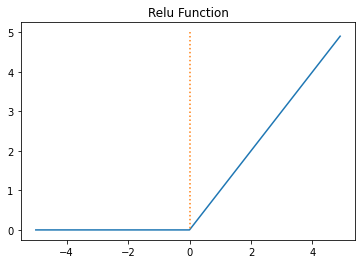

In [4]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Relu Function')
plt.show()

다 좋은데, 입력값이 음수면 기울기도 0이 돼버려서, 이 뉴런은 다시 회생하는 것이 매우 어려워진다. 이 문제를 죽은 렐루 (dying ReLU)라고 한다.

### 리키 렐루 (Leaky ReLU)
---
  죽은 렐루르 보완하기 위해 ReLU 변형 함수 중 하나인 Leaky ReLU <br>
  음수 일 경우에 0이 아니라 0.001과 같은 매우 작은 수를 반환 하도록 

$$ f(x) = max(ax,x) $$
  

In [5]:
a = 0.1

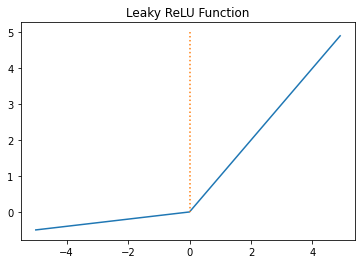

In [7]:
def leaky_relu(x):
  return np.maximum(a*x, x)

x = np.arange(-5.0, 5.0, 0.1)
y = leaky_relu(x)

plt.plot(x,y)
plt.plot([0,0], [5.0,0.0], ':')
plt.title('Leaky ReLU Function')
plt.show()


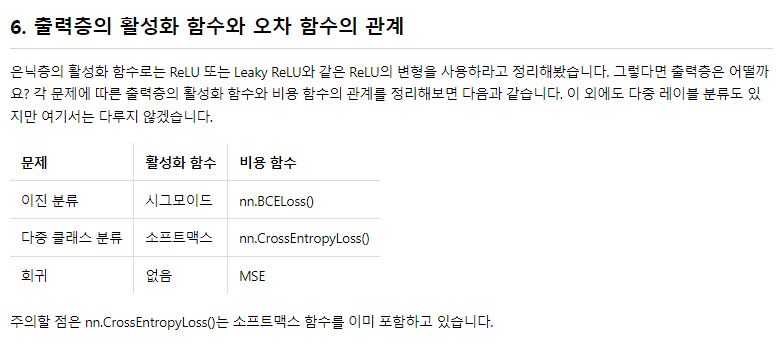

## 다층 퍼셉트론으로 손글씨 분류하기

In [8]:
%matplotlib inline
from sklearn.datasets import load_digits

digits = load_digits()

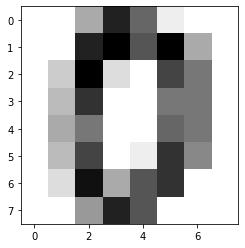

In [16]:
plt.imshow(digits['images'][0], cmap='gray_r')

In [17]:
print('전체 샘플의 수 : {}'.format(len(digits.images)))

전체 샘플의 수 : 1797


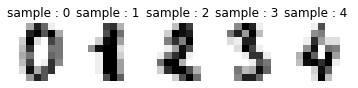

In [19]:
images_labels = list(zip(digits['images'], digits['target']))

for index, (image, label) in enumerate(images_labels[:5]):
  plt.subplot(2,5, index+1)
  plt.axis('off')
  plt.imshow(image, cmap=plt.cm.gray_r, interpolation = 'nearest')
  plt.title('sample : %i ' % label)

In [21]:
for i in range(5):
  print(i, '번 인덱스 샘플의 레이블 : ', digits['target'][i])

0 번 인덱스 샘플의 레이블 :  0
1 번 인덱스 샘플의 레이블 :  1
2 번 인덱스 샘플의 레이블 :  2
3 번 인덱스 샘플의 레이블 :  3
4 번 인덱스 샘플의 레이블 :  4


In [22]:
X = digits['data'] # image 
Y = digits['target'] # label

### 다층 퍼셉트론 분류기 만들자
---

In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [26]:
model = nn.Sequential(
    nn.Linear(64, 32), # 8 x 8 차원의 벡터를 --> 64차원으로 
    nn.ReLU(),
    nn.Linear(32,16),
    nn.ReLU(),
    nn.Linear(16,10) # 10개의 카테고리
)

In [33]:
X = torch.tensor(X, dtype=torch.float)
Y = torch.tensor(Y, dtype=torch.int64)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


In [34]:
# loss_fn 정의
loss_fn = nn.CrossEntropyLoss()

# optimizer

optimizer = optim.Adam(model.parameters())

In [35]:
losses = []

for epoch in range(100):
  optimizer.zero_grad()
  y_pred = model(X)
  loss = loss_fn(y_pred, Y)
  loss.backward()

  optimizer.step()

  if epoch % 20 == 0:
    print(f'{epoch } / 100 , Loss : {loss}')
  losses.append(loss.item())

0 / 100 , Loss : 2.428831100463867
20 / 100 , Loss : 1.8304003477096558
40 / 100 , Loss : 1.2473552227020264
60 / 100 , Loss : 0.7137803435325623
80 / 100 , Loss : 0.40543627738952637


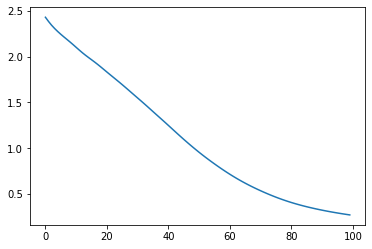

In [36]:
plt.plot(losses)

## 다층 퍼셉트론으로 MNIST 분류하기

In [167]:
# 데이터 로드

from sklearn.datasets import fetch_openml

In [168]:
mnist = fetch_openml('mnist_784',version=1, cache=True)


In [169]:
mnist.target = mnist.target.astype(np.int8)

In [170]:
X = np.array(mnist.data) / 255  # 0 ~ 1로 정규화
Y = mnist.target

label : 5


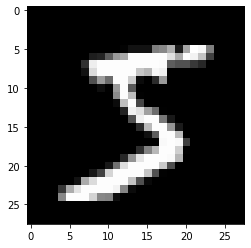

In [171]:
plt.imshow(X[0].reshape(28,28), cmap='gray')
print(f'label : {Y[0]}')

### 훈련 / 테스트 Split
---

In [219]:
mnist = fetch_openml('mnist_784', version=1, cache=True)

In [220]:
mnist.target = mnist.target.astype(np.int8)

In [224]:
X = np.array(mnist.data) / 255  # 0-255값을 [0,1] 구간으로 정규화
y = mnist.target

In [228]:
X_train, X_test, y_train, y_test = train_test_split(X, y.values, test_size=1/7, random_state=0)

X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

ds_train = TensorDataset(X_train, y_train)
ds_test = TensorDataset(X_test, y_test)

loader_train = DataLoader(ds_train, batch_size=64, shuffle=True)
loader_test = DataLoader(ds_test, batch_size=64, shuffle=False)

In [229]:
from torch import nn

model = nn.Sequential()
model.add_module('fc1', nn.Linear(1*28*28, 100))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(100, 100))
model.add_module('relu2', nn.ReLU())
model.add_module('fc3', nn.Linear(100, 10))

print(model)

Sequential(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


In [230]:
# 오차함수
criterion = nn.CrossEntropyLoss()

# optimizer 
optimizer = optim.Adam(model.parameters(), lr=0.01)


In [238]:
def train(epoch):
  model.train() # 신경망을 학습모드로..?

  for data, targets in loader_train:

    optimizer.zero_grad()
    outputs = model(data)
    loss = criterion(outputs, targets)
    loss.backward()

    optimizer.step()

  print(f'epoch : {epoch} 완료!')

In [239]:
def test():
  model.eval() # 신경망을 추론모드로 ( 평가모드로 ) 
  correct  = 0
  
  with torch.no_grad(): # 미분 X
    for data, targets in loader_test:
      outputs = model(data)

      # 추론 계산
      _, predicted = torch.max(outputs.data, 1) # 확률이 가장 높은 레이블이 무엇인지 계산
      correct += predicted.eq(targets.data.view_as(predicted)).sum() # 정답과 일치한 경우 정답 카운트를 증가

    data_num = len(loader_test.dataset)
    print('\n테스트 데이터에서 예측 정확도: {}/{} ({:.0f}%)\n'.format(correct,
                                                   data_num, 100. * correct / data_num))

In [240]:
for epoch in range(3):
  train(3)
test()

epoch : 3 완료!
epoch : 3 완료!
epoch : 3 완료!

테스트 데이터에서 예측 정확도: 9639/10000 (96%)



10000사이의 숫자를 입력해주세요 >> 20
예측 결과 : 7
 Label 은 : 7


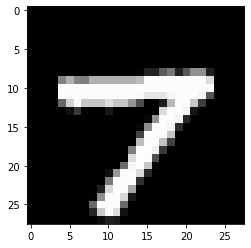

In [245]:


index = int(input('10000사이의 숫자를 입력해주세요 >> '))

model.eval()

data=X_test[index]
output = model(data)

_, predicted = torch.max(output.data, 0) # 확률이 가장 높은 레이블

print(f'예측 결과 : {predicted}')

X_test_show = (X_test[index]).numpy()
plt.imshow(X_test_show.reshape(28,28), cmap='gray')
print(f' Label 은 : {y_test[index]}')


## 과적합(Overfitting)을 막는 방법
---
  1. 데이터의 양을 증가시키자
  2. 모델의 복잡도를 줄이자
  3. 가중치 규제 ( Regularization) 적용하기
    : HyperParameter 튜닝
  4. Dropout 
    : 학습시에는 사용하고, 예측할때는 사용 하지 않는다.
    

## 기울기 소실 (Gradient Vanishing)과 폭주 (Exploding)
---
  1. ReLU와 ReLU의 변형들
    * 은닉층에서는 '시그모이드 함수' 사용 금지
    * Dying ReLU를 살리는 방법은 다양하게 있다. 변형된 ReLU
  2. 가중치 초기화 ( Weight initialization )
    * 세이비어, 자비에 초기화
    --> S자 형태인 활성화 함수와 함께 사용할 경우에는 좋은 성능을 보인다.
    But ReLU에는 좋지 않은 성능을 보임
    * He 초기화 (He initialization )
    --> ReLU에는 He / 나머지 S자 모형 활성화함수에는 자비에 초기화
  3. 배치 정규화 ( Batch Normalization )
    * 내부 공변량 변화 ( Internal Covariate Shift )
    : 층 별로 입력 데이터 분포가 달라지는 현상 
    이러한 문제를 해결하기 위해 배치 정규화를 사용한다.
    * 배치 정규화 
      한 번에 들어오는 배치 단위로 정규화 하는 것.  <br>
      각 층에서 활성화 함수를 통과하기 전에 수행. <br>
      드랍아웃과 같이 사용하도록 하면 더욱더 좋은 성능 <br>
      하지만 실행 시간이 느려진다. 시간을 고려할때 필수적으로 고민! <br>
     * <font color='red'>한계점도 존재한다. </font>
      1. 미니 배치 크기에 의존적이다. 
        너무 작은 배치 크기에서는 잘 동작하지 않을 수 있따. 
      2. RNN에 적용하기 어렵다.
        RNN에는 '층 정규화' 라는 방법을 사용
  4. 층 정규화 ( Layer Normalization )
    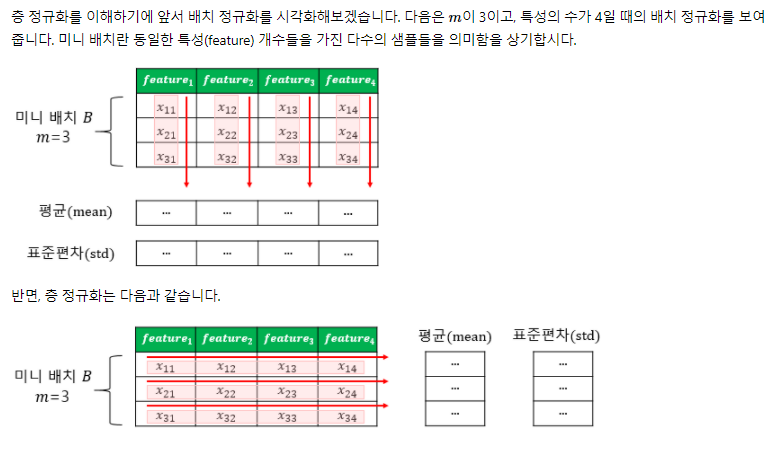



      
      
